In [155]:
import pandas as pd


df_preds = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/work_dirs/evaluate_on_many_sentences/results/deberta-v3-data-wiki_sci-with-wiki-sentence-context-eval-kaggle-all-folds-grad-accum-128-60k-viktor-dataset-deotte-preproc-deberta-v3-large-2023-09-10-00-56-02-checkpoint-22500.csv")

df_preds

,id,score0,score1,score2,score3,score4,prediction
0,0,-0.006791,0.171161,-0.226158,-0.746733,-0.601581,D E C
1,1,-0.311702,0.087955,0.622117,0.693339,0.165397,A B E
2,2,-0.307754,-0.163468,-0.182509,-0.873334,0.287303,D A C
3,3,-0.129456,0.626614,0.215087,0.477442,0.562479,A C D
4,4,-0.304767,0.497450,0.505426,-0.586865,0.244527,D A E
...,...,...,...,...,...,...,...
195,195,0.188727,0.583043,-0.469305,0.631122,0.076693,C E A
196,196,0.404004,0.223116,0.239763,0.459631,0.719898,B C A
197,197,-0.494151,-0.487661,-0.397225,-0.475112,-0.366719,A B D
198,198,0.409637,0.044270,0.043874,0.003036,0.910112,D C B


In [156]:
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/work_dirs/evaluate_on_many_sentences/train_context.csv")
df['id'] = df.index

df

,prompt,context,A,B,C,D,E,answer,id
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0
1,Which of the following is an accurate definiti...,Many of these systems evolve in a self-similar...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1
2,Which of the following statements accurately d...,It is possible that this usage is related with...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2
3,What is the significance of regularization in ...,Renormalization is distinct from regularizatio...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3
4,Which of the following statements accurately d...,Several qualitative observations can be made o...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4
...,...,...,...,...,...,...,...,...,...
195,What is the relation between the three moment ...,The second equation is more general as it does...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195
196,"What is the throttling process, and why is it ...",A throttle is the mechanism by which fluid flo...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196
197,What happens to excess base metal as a solutio...,"Furthermore, this melting may begin at a tempe...","The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197
198,"What is the relationship between mass, force, ...",Newton first set out the definition of mass Th...,Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D,198


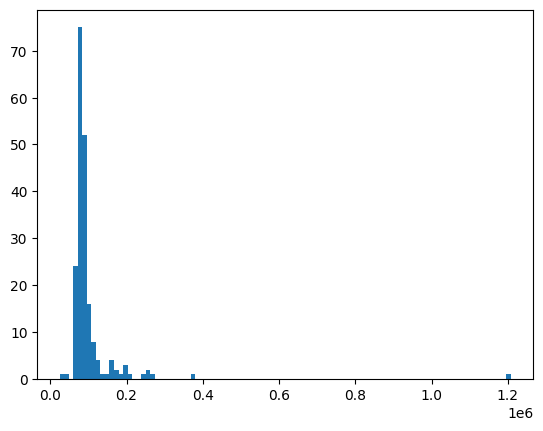

In [157]:
df['context_len'] = df['context'].apply(lambda x: len(x))
import matplotlib.pyplot as plt

plt.hist(df['context_len'], bins=100);

In [158]:
df_merged = df.merge(df_preds, on='id', how='left')
df_merged   

,prompt,context,A,B,C,D,E,answer,id,context_len,score0,score1,score2,score3,score4,prediction
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,136313,-0.006791,0.171161,-0.226158,-0.746733,-0.601581,D E C
1,Which of the following is an accurate definiti...,Many of these systems evolve in a self-similar...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,72537,-0.311702,0.087955,0.622117,0.693339,0.165397,A B E
2,Which of the following statements accurately d...,It is possible that this usage is related with...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,76750,-0.307754,-0.163468,-0.182509,-0.873334,0.287303,D A C
3,What is the significance of regularization in ...,Renormalization is distinct from regularizatio...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,87199,-0.129456,0.626614,0.215087,0.477442,0.562479,A C D
4,Which of the following statements accurately d...,Several qualitative observations can be made o...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,79870,-0.304767,0.497450,0.505426,-0.586865,0.244527,D A E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,What is the relation between the three moment ...,The second equation is more general as it does...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,90760,0.188727,0.583043,-0.469305,0.631122,0.076693,C E A
196,"What is the throttling process, and why is it ...",A throttle is the mechanism by which fluid flo...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,79766,0.404004,0.223116,0.239763,0.459631,0.719898,B C A
197,What happens to excess base metal as a solutio...,"Furthermore, this melting may begin at a tempe...","The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,48333,-0.494151,-0.487661,-0.397225,-0.475112,-0.366719,A B D
198,"What is the relationship between mass, force, ...",Newton first set out the definition of mass Th...,Mass is a property that determines the weight ...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is an inertial property that determines a...,Mass is a property that determines the size of...,D,198,116856,0.409637,0.044270,0.043874,0.003036,0.910112,D C B


In [159]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

df_merged[['score_A','score_B','score_C','score_D','score_E']] = df_merged[['score0','score1','score2','score3','score4']].apply(lambda x: softmax(-x.values), axis=1, result_type='expand')
df_merged

,prompt,context,A,B,C,D,E,answer,id,context_len,...,score1,score2,score3,score4,prediction,score_A,score_B,score_C,score_D,score_E
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,136313,...,0.171161,-0.226158,-0.746733,-0.601581,D E C,0.143046,0.119727,0.178134,0.299799,0.259293
1,Which of the following is an accurate definiti...,Many of these systems evolve in a self-similar...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,72537,...,0.087955,0.622117,0.693339,0.165397,A B E,0.327846,0.219837,0.128860,0.120001,0.203455
2,Which of the following statements accurately d...,It is possible that this usage is related with...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,76750,...,-0.163468,-0.182509,-0.873334,0.287303,D A C,0.197632,0.171078,0.174366,0.347924,0.109000
3,What is the significance of regularization in ...,Renormalization is distinct from regularizatio...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,87199,...,0.626614,0.215087,0.477442,0.562479,A C D,0.310203,0.145643,0.219792,0.169073,0.155289
4,Which of the following statements accurately d...,Several qualitative observations can be made o...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,79870,...,0.497450,0.505426,-0.586865,0.244527,D A E,0.263409,0.118095,0.117157,0.349257,0.152081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,What is the relation between the three moment ...,The second equation is more general as it does...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,90760,...,0.583043,-0.469305,0.631122,0.076693,C E A,0.186353,0.125628,0.359844,0.119731,0.208445
196,"What is the throttling process, and why is it ...",A throttle is the mechanism by which fluid flo...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,79766,...,0.223116,0.239763,0.459631,0.719898,B C A,0.197949,0.237198,0.233282,0.187238,0.144332
197,What happens to excess base metal as a solutio...,"Furthermore, this melting may begin at a tempe...","The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,48333,...,-0.487661,-0.397225,-0.475112,-0.366719,A B D,0.209967,0.208609,0.190571,0.206007,0.184845
198,"What is the relationship between mass, force, ...",Newton first set out the definition of mass Th...,Mass is a prop

In [160]:
import pandas as pd
import numpy as np

# Define a function to apply for each group
def get_top_scores(sub_df):
    # Extract scores
    x = sub_df[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].values
    
    # Get the max value for each column in the group
    max_scores = np.max(x, axis=0)
    
    # Get the top 3 columns by scores
    top3_cols = max_scores.argsort()[-3:][::-1]
    columns = ['A', 'B', 'C', 'D', 'E']
    top3_scores = [columns[i] for i in top3_cols]
    
    # Extract the letters from the column names and join them
    top3_str = ' '.join([score.split('_')[-1] for score in top3_scores])
    
    return top3_str

def get_score_avgs(sub_df):
    # Extract scores
    x = sub_df[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].values
    
    # Get the max value for each column in the group
    mean_scores = np.mean(x, axis=0)
    
    x = x - mean_scores
    
    # Get the max value for each column in the group
    max_scores = np.max(x, axis=0)
    
    # Get the top 3 columns by scores
    top3_cols = max_scores.argsort()[-3:][::-1]
    columns = ['A', 'B', 'C', 'D', 'E']
    top3_scores = [columns[i] for i in top3_cols]
    
    # Extract the letters from the column names and join them
    top3_str = ' '.join([score.split('_')[-1] for score in top3_scores])
    
    return top3_str
    

# Group by 'promp' and apply the function
df_grouped = df_merged.groupby('prompt').apply(get_top_scores).reset_index(name='prediction_2')
df_grouped_2 = df_merged.groupby('prompt').apply(get_score_avgs).reset_index(name='prediction_3')

df_grouped = df_grouped.merge(df_grouped_2, on='prompt', how='inner')

df_grouped

,prompt,prediction_2,prediction_3
0,"How do the Lunar Laser Ranging Experiment, rad...",B C E,E D C
1,How many crystallographic point groups are the...,B E D,E D C
2,What are amorphous ferromagnetic metallic allo...,D E B,E D C
3,What are coherent turbulent structures?,C D B,E D C
4,What are permutation-inversion groups?,E B A,E D C
...,...,...,...
195,Who published the first theory that was able t...,A D B,E D C
196,Who shared the other half of the Nobel Prize w...,E B C,E D C
197,Who was Giordano Bruno?,D E C,E D C
198,Who was the first person to describe the pulmo...,C E B,E D C


In [161]:
# merge with original df
df_merged = df_merged.merge(df_grouped, on='prompt', how='inner')
df_merged

,prompt,context,A,B,C,D,E,answer,id,context_len,...,score3,score4,prediction,score_A,score_B,score_C,score_D,score_E,prediction_2,prediction_3
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,136313,...,-0.746733,-0.601581,D E C,0.143046,0.119727,0.178134,0.299799,0.259293,D E C,E D C
1,Which of the following is an accurate definiti...,Many of these systems evolve in a self-similar...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,72537,...,0.693339,0.165397,A B E,0.327846,0.219837,0.128860,0.120001,0.203455,A B E,E D C
2,Which of the following statements accurately d...,It is possible that this usage is related with...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,76750,...,-0.873334,0.287303,D A C,0.197632,0.171078,0.174366,0.347924,0.109000,D A C,E D C
3,What is the significance of regularization in ...,Renormalization is distinct from regularizatio...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,87199,...,0.477442,0.562479,A C D,0.310203,0.145643,0.219792,0.169073,0.155289,A C D,E D C
4,Which of the following statements accurately d...,Several qualitative observations can be made o...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,79870,...,-0.586865,0.244527,D A E,0.263409,0.118095,0.117157,0.349257,0.152081,D A E,E D C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,What is the relation between the three moment ...,The second equation is more general as it does...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,90760,...,0.631122,0.076693,C E A,0.186353,0.125628,0.359844,0.119731,0.208445,C E A,E D C
196,"What is the throttling process, and why is it ...",A throttle is the mechanism by which fluid flo...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,79766,...,0.459631,0.719898,B C A,0.197949,0.237198,0.233282,0.187238,0.144332,B C A,E D C
197,What happens to excess base metal as a solutio...,"Furthermore, this melting may begin at a tempe...","The excess base metal will often solidify, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often dissolve, bec...","The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",B,197,48333,...,-0.475112,-0.366719,A B D,0.209967,0.208609,0.190571,0.206007,0.184845,A B D,E D C
198,"What is the relationship between mass, force, ...",Newton first set out the definition of mass Th...,Mass is a property that determines the weight ...,Mass i

In [162]:
df_merged['max_score'] = df_merged[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.max(x.values), axis=1)
df_merged['second_to_max_score'] = df_merged[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.sort(x.values)[-2], axis=1)
df_merged['second_to_max_score_pct'] = df_merged[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.sort(x.values)[-2] / np.max(x.values), axis=1)

# if second_to_max_score_pct > 0.95, swap prediction
def swap_answers(x):
    pred = x['prediction_2']
    if x['second_to_max_score_pct'] > 0.95:
        return f"{pred[1]} {pred[0]} {pred[2]}"
    else:
        return f"{pred[0]} {pred[1]} {pred[2]}"

df_merged['prediction'] = df_merged.apply(lambda x: swap_answers(x), axis=1)



In [163]:
df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][0], axis=1)
df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][0], axis=1)
df_merged['is_correct_answer_3'] = df_merged[['answer', 'prediction_3']].apply(lambda x: x['answer'] == x['prediction_3'][0], axis=1)

df_merged.groupby('prompt').is_correct_answer.mean().mean(), df_merged.groupby('prompt').is_correct_answer_2.mean().mean(), df_merged.groupby('prompt').is_correct_answer_3.mean().mean()

(0.71, 0.81, 0.165)

In [136]:
df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][2], axis=1)
df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][2], axis=1)
df_merged['is_correct_answer_3'] = df_merged[['answer', 'prediction_3']].apply(lambda x: x['answer'] == x['prediction_3'][2], axis=1)

df_merged.groupby('prompt').is_correct_answer.mean().mean(), df_merged.groupby('prompt').is_correct_answer_2.mean().mean(), df_merged.groupby('prompt').is_correct_answer_3.mean().mean()

(0.11, 0.11, 0.19)

In [112]:
# df_merged['is_correct_answer'] = df_merged[['answer', 'prediction']].apply(lambda x: x['answer'] == x['prediction'][4], axis=1)
# df_merged['is_correct_answer_2'] = df_merged[['answer', 'prediction_2']].apply(lambda x: x['answer'] == x['prediction_2'][4], axis=1)
# df_merged['is_correct_answer_3'] = df_merged[['answer', 'prediction_3']].apply(lambda x: x['answer'] == x['prediction_3'][4], axis=1)

# df_merged.groupby('prompt').is_correct_answer.mean().mean(), df_merged.groupby('prompt').is_correct_answer_2.mean().mean(), df_merged.groupby('prompt').is_correct_answer_3.mean().mean()

# let's find out what context worked best

In [137]:
df_wrong_answers = df_merged[df_merged['is_correct_answer_2'] == False].reset_index(drop=True)
df_correct_answers = df_merged[df_merged['is_correct_answer_2'] == True].reset_index(drop=True)

In [138]:
df_correct_answers['max_score'] = df_correct_answers[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.max(x.values), axis=1)
df_correct_answers['second_to_max_score'] = df_correct_answers[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.sort(x.values)[-2], axis=1)
df_correct_answers['second_to_max_score_pct'] = df_correct_answers[['score_A', 'score_B', 'score_C', 'score_D', 'score_E']].apply(lambda x: np.sort(x.values)[-2] / np.max(x.values), axis=1)
df_correct_answers

,prompt,context,A,B,C,D,E,answer,id,context_len,...,score_D,score_E,prediction_2,prediction_3,is_correct_answer,is_correct_answer_2,is_correct_answer_3,max_score,second_to_max_score,second_to_max_score_pct
0,Which of the following statements accurately d...,It is possible that this usage is related with...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,2,76750,...,0.347924,0.109000,D A C,E D C,True,True,False,0.347924,0.197632,0.568031
1,What is the significance of regularization in ...,Renormalization is distinct from regularizatio...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,3,87199,...,0.169073,0.155289,A C D,E D C,True,True,False,0.310203,0.219792,0.708545
2,Which of the following statements accurately d...,"For a closed Gaussian surface, electric flux i...",Gauss's law holds only for situations involvin...,"Gauss's law holds in all cases, but it is most...","Gauss's law, which applies equally to all elec...",Gauss's law only holds for electric fields wit...,"Gauss's law, which holds for all situations, i...",B,5,106537,...,0.097454,0.268863,E B C,E D C,True,True,False,0.268863,0.261313,0.971920
3,What is one of the examples of the models prop...,The current standard model of cosmology is the...,"The Copernican principle, which proposes that ...","Inhomogeneous cosmology, which states that the...","Inhomogeneous cosmology, which models the univ...","The cosmological principle, which proposes tha...","The principle of dark energy, which proposes t...",C,12,79915,...,0.144412,0.237898,E C A,E D C,True,True,False,0.237898,0.223662,0.940159
4,What is the Penrose process?,The Penrose process (also called Penrose mecha...,The Penrose process is a mechanism through whi...,The Penrose process is a mechanism through whi...,The Penrose process is a mechanism through whi...,The Penrose process is a mechanism through whi...,The Penrose process is a mechanism through whi...,C,34,174021,...,0.135987,0.311139,E C D,E D C,True,True,False,0.311139,0.302584,0.972504
5,What is the information loss paradox in black ...,This perspective holds that Hawking's computat...,Black holes have an infinite number of interna...,Black holes have an infinite number of interna...,Black holes have only a few internal parameter...,Black holes have only a few internal parameter...,Black holes have only a few internal parameter...,C,43,76888,...,0.294112,0.193852,D C E,E D C,True,True,False,0.294112,0.220685,0.750344
6,Who shared the other half of the Nobel Prize w...,was a Japanese theoretical physicist known for...,Richard Feynman and Julian Schwinger,Makoto Kobayashi and Toshihide Maskawa,Steven Weinberg and Sheldon Glashow,Peter Higgs and Francois Englert,Murray Gell-Mann and George Zweig,B,46,84867,...,0.127726,0.303821,E B C,E D C,True,True,False,0.303821,0.253306,0.833734
7,What is the Maxwell's Demon thought experiment?,The demon must allow molecules to pass in both...,A thought experiment in which a demon guards a...,A thought experiment in which a demon guards a...,A thought experiment in which a demon guards a...,A thought experiment in which a demon guards a...,A thought experiment in which a demon guards a...,C,68,92228,...,0.202694,0.189890,A C D,E D C,True,True,False,0.210897,0.209805,0.994823
8,What is the piezoelectric strain coefficient f...,Within a certain range of strain this relation...,d = 1.9·10‑12 m/V,d = 3.1·10‑12 m/V,d = 4.2·10‑12 m/V,d = 2.5·10‑12 m/V,d = 5.8·10‑12 m/V,B,75,112912,...,0.166811,0.198560,C B A,E D C,True,True,False,0.217968,0.210610,0.966243
9,"Who proposed the principle of ""complexity from...","""The Complexi

8 22


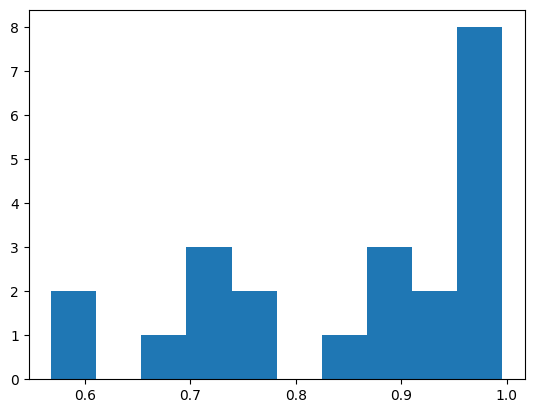

In [139]:
import matplotlib.pyplot as plt

plt.hist(df_correct_answers[['second_to_max_score_pct']]);

print(np.sum(df_correct_answers[['second_to_max_score_pct']].values>0.95), len(df_correct_answers))

In [115]:
df_wrong_answers

,prompt,context,A,B,C,D,E,answer,id,context_len,...,score_A,score_B,score_C,score_D,score_E,prediction_2,prediction_3,is_correct_answer,is_correct_answer_2,is_correct_answer_3
0,Which of the following statements accurately d...,The presence of a clustered thick disk-like co...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,0,136313,...,0.143046,0.119727,0.178134,0.299799,0.259293,D E C,E D C,False,False,True
1,Which of the following is an accurate definiti...,Many of these systems evolve in a self-similar...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,1,72537,...,0.327846,0.219837,0.128860,0.120001,0.203455,A B E,E D C,False,False,False
2,Which of the following statements accurately d...,Several qualitative observations can be made o...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,4,79870,...,0.263409,0.118095,0.117157,0.349257,0.152081,D A E,E D C,False,False,True
3,Which of the following statements accurately d...,This extra-block can be treated as a (-1)-dime...,The dimension of an object in a CW complex is ...,The dimension of an object in a CW complex is ...,The dimension of an object in a CW complex is ...,The dimension of an object in a CW complex is ...,The dimension of an object in a CW complex dep...,A,6,272551,...,0.272751,0.155425,0.243219,0.222661,0.105944,A C D,E D C,False,False,False
4,Which of the following statements accurately d...,The temperature at or above which an antiferro...,The blocking temperature of an antiferromagnet...,The blocking temperature of an antiferromagnet...,The blocking temperature of an antiferromagnet...,The blocking temperature of an antiferromagnet...,The blocking temperature of an antiferromagnet...,D,7,92027,...,0.105684,0.215187,0.125939,0.376641,0.176548,D B E,E D C,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,What is a uniform tiling in the hyperbolic plane?,"In geometry, the tetrahexagonal tiling is a un...",A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,A uniform tiling in the hyperbolic plane is an...,D,194,259026,...,0.179032,0.208129,0.180423,0.248468,0.183949,D B E,E D C,False,False,True
174,What is the relation between the three moment ...,The second equation is more general as it does...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,C,195,90760,...,0.186353,0.125628,0.359844,0.119731,0.208445,C E A,E D C,False,False,False
175,"What is the throttling process, and why is it ...",A throttle is the mechanism by which fluid flo...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,B,196,79766,...,0.197949,0.237198,0.233282,0.187238,0.144332,B C A,E D C,False,False,False
176,"What is the relationship between mass, force, ...",Newton first set out the definition of mass Th...,Mass is a property that determines the weight ...,Mass is an inertial property that det

In [164]:
indx = 0

print(df_wrong_answers.iloc[indx]['prompt'])
print("---"*128)
print(df_wrong_answers.iloc[indx]['context'])
print("---"*128)
print(df_wrong_answers.iloc[indx]['answer'])
print("---"*128)
print(df_wrong_answers.iloc[indx]['C'])

Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The presence of a clustered thick disk-like component of dark matter in the Galaxy has been suggested by Sanchez-Salcedo (1997, 1999) and Kerins (1997).Kerins, E. J. 1997, Astronomy and Astrophysics, 322, 709-718 (ADS entry )Sánchez-Salcedo, F. J. 1997, Astrophysical Journal, 487, L61-L64 (ADS entry )Sánchez-Salcedo, F. J. 1999, Monthly Notices of the Royal Astronomical Society, 303, 755-772 (ADS entry ) ==See also== * Dark matter * Br

In [2]:
import pandas as pd
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2.csv")
df = df.fillna("")
df = df[df['answer'].isin(['A', 'B', 'C', 'D', 'E'])]
df.to_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/cdeotte-60k-data-with-context-v2/all_12_with_context2_FIXED.csv")
